### Social Network Ads -   K-NN Algorithm

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Reading the Data set
dataset = pd.read_csv('Social_Network_Ads.csv')
# Independant variables and Dependant Variables
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4:5].values

In [3]:
# Trainning Set and the Test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.25, random_state = 0)


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Xtrain = sc_X.fit_transform(Xtrain)
Xtest =   sc_X.transform(Xtest)

In [5]:
# Fitting the Classifier to the trainning set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier( n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(Xtrain, Ytrain)


D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
# Predict with the K-NN algorithm
Ypred = classifier.predict(Xtest)

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, Ypred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


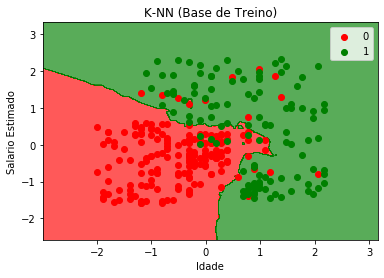

In [8]:
#  Visualing the Trainning set results
from matplotlib.colors import ListedColormap
Xset, Yset = Xtrain[:, [0, 1]], Ytrain[:, 0]
X1, X2 = np.meshgrid( np.arange( start = Xset[:, 0].min() - 1, stop = Xset[:, 0].max() + 1, step = 0.01), 
                      np.arange( start = Xset[:, 1].min() - 1, stop = Xset[:, 1].max() + 1, step = 0.01))
plt.contourf( X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.65, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Yset)):
    plt.scatter(Xset[Yset == j, 0], Xset[Yset == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Base de Treino)')
plt.xlabel('Idade')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


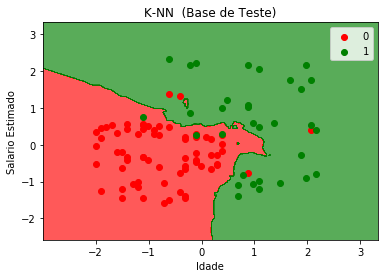

In [9]:
# Visualising the teste set results
from matplotlib.colors import ListedColormap
Xset, Yset = Xtest[:, [0, 1]], Ytest[:, 0]
X1, X2 = np.meshgrid( np.arange( start = Xset[:, 0].min() - 1, stop = Xset[:, 1].max() + 1, step = 0.01), 
                      np.arange( start = Xset[:, 1].min() - 1, stop = Xset[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.65, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Yset)):
    plt.scatter(Xset[Yset == j, 0], Xset[Yset == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN  (Base de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()